## Predicting Used Car Price Depreciation

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://storage.googleapis.com/introduction-to-data-science/car-prices.csv'
df = pd.read_csv(url)

This dataset contains information about used cars listed on www.cardekho.com

The *columns* in the given dataset are as follows:

*Features:*
- **Car_Age**: number of years since the car was bought
- **Present_Price**: the current price of the car out of the factory (in k€)
- **Kms_Driven**: the distance completed by the car (10,000 km)
- **Fuel_Type**: whether the fuel type is Diesel (0) or Petrol (1)
- **Seller_Type**: whether the seller is a dealer (0) or an individual (1)
- **Transmission**: whether the car is automatic (0) or manual (1)

*Target:*
- **depreciation**: % of price decrease between the price the car was sold for and the **Present_Price**

*source: [Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)*

#### Understanding the data

In [3]:
# Rows and columns in the dataset
df.shape

(298, 7)

In [4]:
# Columns and datatypes
df.dtypes

Car_Age            int64
Present_Price    float64
Kms_Driven       float64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
depreciation     float64
dtype: object

In [5]:
# Readable summary of the data
df.describe()

,Car_Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,depreciation
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,4.348993,7.660470,3.535440,0.798658,0.352349,0.869128,0.363680
std,2.882494,8.676554,2.832653,0.401678,0.478506,0.337828,0.202061
min,0.000000,0.320000,0.050000,0.000000,0.000000,0.000000,0.010745
25%,2.000000,1.215000,1.500000,1.000000,0.000000,1.000000,0.209098
50%,4.000000,6.445000,3.180200,1.000000,0.000000,1.000000,0.343821
75%,6.000000,9.900000,4.775000,1.000000,1.000000,1.000000,0.493553
max,15.000000,92.600000,21.300000,1.000000,1.000000,1.000000,0.894648


In [6]:
# Separate columns: Present_Price
df['Present_Price']

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
293    11.60
294     5.90
295    11.00
296    12.50
297     5.90
Name: Present_Price, Length: 298, dtype: float64

In [7]:
# Separate columns: Present_Price and Kms_Driven
df[['Present_Price', 'Kms_Driven']]

,Present_Price,Kms_Driven
0,5.59,2.7000
1,9.54,4.3000
2,9.85,0.6900
3,4.15,0.5200
4,6.87,4.2450
...,...,...
293,11.60,3.3988
294,5.90,6.0000
295,11.00,8.7934
296,12.50,0.9000


### Visualizations

<Axes: xlabel='Kms_Driven', ylabel='depreciation'>

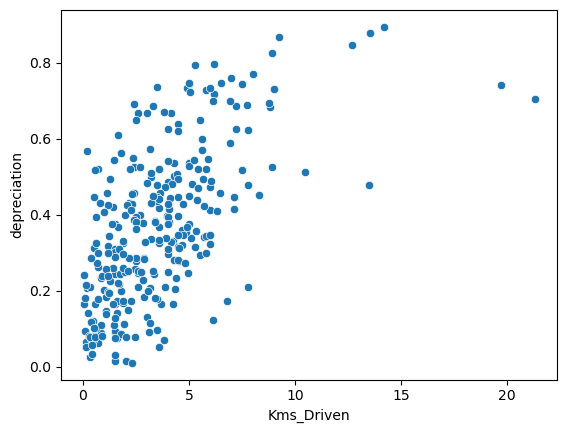

In [8]:
# Determine if the number of kilometers driven or the age of the car affect the depreciation of the car
# Kms_Driven vs depreciation
sns.scatterplot(data=df, x='Kms_Driven', y='depreciation')

<Axes: xlabel='Car_Age', ylabel='depreciation'>

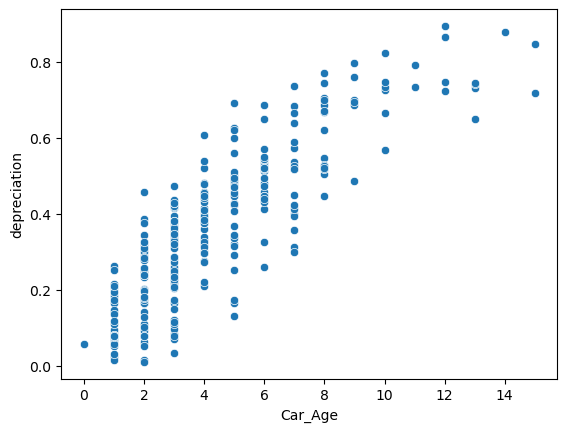

In [9]:
# Car_Age vs depreciation
sns.scatterplot(data=df, x='Car_Age', y='depreciation')

<Axes: xlabel='Kms_Driven', ylabel='depreciation'>

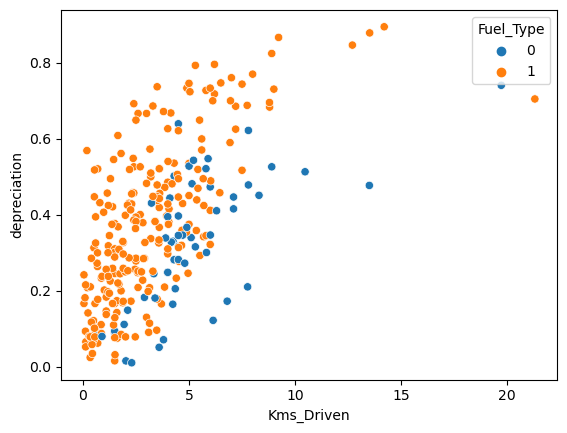

In [10]:
# Determine if petrol car depreciate faster that diesel car
#fuel type: Diesel (0) or Petrol (1)

sns.scatterplot(data=df, x="Kms_Driven", y="depreciation", hue="Fuel_Type")

<Axes: xlabel='Seller_Type', ylabel='count'>

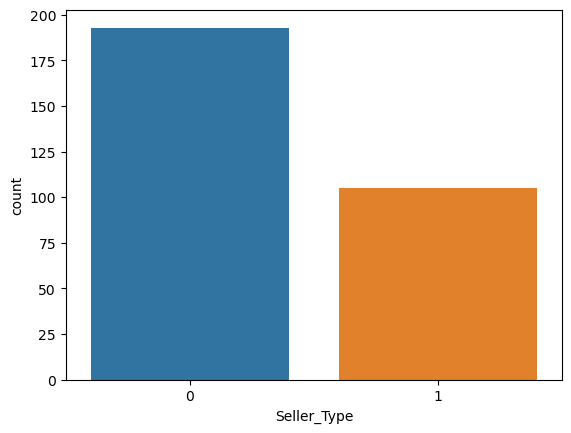

In [11]:
# Determine how many professional dealers vs individual sellers are there in the dataset
# Seller_Type: whether the seller is a dealer (0) or an individual (1)

sns.countplot(data=df, x="Seller_Type")

<Axes: xlabel='Transmission', ylabel='count'>

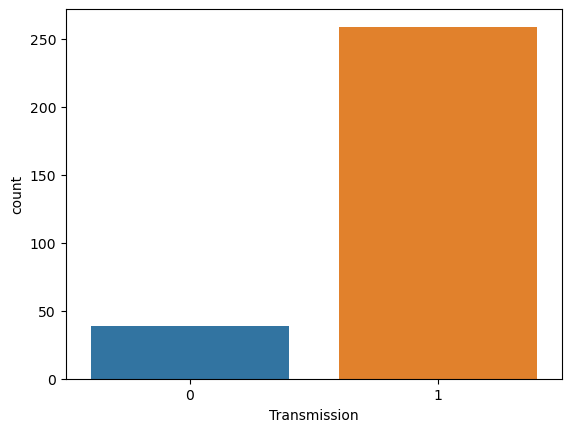

In [12]:
# Determine how many automatic vs manual transmission cars are there in the dataset
# Transmission: whether the car is automatic (0) or manual (1)
sns.countplot(data=df, x="Transmission")

### Linear Regression Model

In [27]:
# Import and Initialize model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
# Split the data into features(x) and target(y)

features = df.drop(['depreciation'], axis='columns')
target = df['depreciation']

In [29]:
# Train the model
model.fit(features, target)

LinearRegression()

In [30]:
# Score the model
model.score(features, target)

0.7525848407036185

#### Predict
The car has the following characteristics:
- **Age**: 3 years
- **Present price**: $15,000
- **Kms driven**: 30,000
- **Fuel**: Diesel
- The **seller** is a professional dealer
- **Transmission**: Manual

In [32]:
new_car = [[3, 15.0, 3, 0, 0, 1]]
model.predict(new_car)

C:\Users\nevas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.24609526])

In [35]:
# Car depreciation with 60,000 km
new_car = [[3, 15.0, 3, 0, 0, 1], [3, 15.0, 6, 0, 0, 1]]
model.predict(new_car)

C:\Users\nevas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.24609526, 0.28718727])

In [36]:
# Explaining the model
# check the coefficients of the model
model.coef_

array([0.04974401, 0.00296899, 0.01369734, 0.07512606, 0.02558348,
       0.03115334])

In [39]:
# Column name with coef_ input

pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,Car_Age,0.049744
1,Present_Price,0.002969
2,Kms_Driven,0.013697
3,Fuel_Type,0.075126
4,Seller_Type,0.025583
5,Transmission,0.031153


In [40]:
# Check the intercept of the model
model.intercept_
# This is the target (depreciation) for when all inputs are 0 (new car out of factory)

-0.01991689935055979

### Holdout Method

In [44]:
# Import the model
from sklearn.model_selection import train_test_split

In [45]:
# create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [50]:
# Determine what percentage of the observations were allocated to the train and the test set?
print(f"Percentage in train set: {round(X_train.shape[0]/features.shape[0], 2)}%")
print(f"Percentage in test set: {round(X_test.shape[0]/features.shape[0], 2)}%")

Percentage in train set: 0.75%
Percentage in test set: 0.25%


In [46]:
# Initialize the model
model2 = LinearRegression()

In [47]:
# Train the model on the training set
model2.fit(X_train, y_train)

LinearRegression()

In [48]:
# Score the model on the test set
model2.score(X_test, y_test)

0.7113987618946471

In [49]:
# score to the one the model gets on the training set
model2.score(X_train, y_train)

0.7573709846636194

In [ ]:
# The two scores are relatively close to each other, which shows that we achieved a good balance. 
# Our model generalizes well to new observations, explaining more than 70% of change in depreciation.

In [51]:
# Predict the depreciation for a new car
new_car = [[3, 15.0, 3, 0, 0, 1]]

model2.predict(new_car)

C:\Users\nevas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.24999203])